# Задание

In [ ]:
#ЗАДАНИЕ №4

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [8]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [9]:
df.shape

(50000, 28)

In [5]:
pd.set_option('display.max_columns',df.shape[1])
pd.get_option('display.max_columns')


NameError: name 'df' is not defined

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
age                    50000 non-null int64
gender                 49277 non-null object
city_type              50000 non-null object
full_mob               50000 non-null int64
ml_balance             50000 non-null float64
cl_balance_0m          50000 non-null float64
loan_balance_0m        50000 non-null float64
td_balance_0m          50000 non-null float64
casa_balance_0m        50000 non-null float64
dc_trx_cnt             50000 non-null int64
dc_trx_sum             50000 non-null float64
income                 50000 non-null float64
min_casa_balance_1q    50000 non-null float64
max_casa_balance_1q    50000 non-null float64
avg_casa_balance_1Y    50000 non-null float64
min_td_balance_1q      50000 non-null float64
max_td_balance_1q      50000 non-null float64
avg_td_balance_1Y      50000 non-null float64
min_loan_balance_1q    50000 non-null float64
max_loan_balance_1q    50

In [30]:
df.isnull().sum(axis=0)

age                        0
gender                     0
city_type                  0
full_mob                   0
ml_balance                 0
cl_balance_0m              0
loan_balance_0m            0
td_balance_0m              0
casa_balance_0m            0
dc_trx_cnt                 0
dc_trx_sum                 0
income                     0
min_casa_balance_1q        0
max_casa_balance_1q        0
avg_casa_balance_1Y        0
min_td_balance_1q          0
max_td_balance_1q          0
avg_td_balance_1Y          0
min_loan_balance_1q        0
max_loan_balance_1q        0
avg_loan_balance_1Y        0
min_cl_balance_1q          0
max_cl_balance_1q          0
avg_cl_balance_1Y          0
loan_to_deposit        45486
Avg_trx                17720
avgtrx_to_balance      18329
nbi                     2367
dtype: int64

In [7]:
#Принято решение одно из исследований df сделать по   полю gender.
print((49277/50000)*100) # Поле заполнено на 98,6%, поэтому   для дальнейшего анализа  df принято решение убрать из df  все строки с NaN
                #  по полю  gender. NaN  по полям Avg_trx, avgtrx_to_balance,nbi нулями не заполняем, так как планируется
#расчет средних значений,а значения NaN не учитываются при вычислении средних значений,что и необходимо.


98.554


In [8]:
df.dropna(subset=['gender'],inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49277 entries, 5 to 49999
Data columns (total 28 columns):
age                    49277 non-null int64
gender                 49277 non-null object
city_type              49277 non-null object
full_mob               49277 non-null int64
ml_balance             49277 non-null float64
cl_balance_0m          49277 non-null float64
loan_balance_0m        49277 non-null float64
td_balance_0m          49277 non-null float64
casa_balance_0m        49277 non-null float64
dc_trx_cnt             49277 non-null int64
dc_trx_sum             49277 non-null float64
income                 49277 non-null float64
min_casa_balance_1q    49277 non-null float64
max_casa_balance_1q    49277 non-null float64
avg_casa_balance_1Y    49277 non-null float64
min_td_balance_1q      49277 non-null float64
max_td_balance_1q      49277 non-null float64
avg_td_balance_1Y      49277 non-null float64
min_loan_balance_1q    49277 non-null float64
max_loan_balance_1q    49

In [ ]:
I.

In [6]:
#Проанализируем траты по картам мужчин и женнщин. Для этого создадим новый df_fm на базе исходного. Найдем средние значения 
#(на одного мужчину, на одну женщину)  требуемых показателей в разрезе мужчин и женщин.

In [9]:
#Посчитаем количество мужчин и количество женщин в  исходном df
df.groupby(['gender'])['dc_trx_cnt'].nunique()

gender
F     995
М    1072
Name: dc_trx_cnt, dtype: int64

In [184]:

df_fm=df.groupby(['gender'])['dc_trx_cnt', 'avgtrx_to_balance','dc_trx_sum','Avg_trx'].mean().reset_index()
df_fm.set_index('gender', inplace=True)
#Приведем данные к одному масштабу для визуализации hits
df_fm['dc_trx_sum']=df_fm['dc_trx_sum']/1000
df_fm['Avg_trx']=df_fm['Avg_trx']/10
df_fm


,dc_trx_cnt,avgtrx_to_balance,dc_trx_sum,Avg_trx
gender,,,,
F,111.215255,118.622032,207.842854,459.010252
М,99.438531,557.186301,229.502170,579.371713


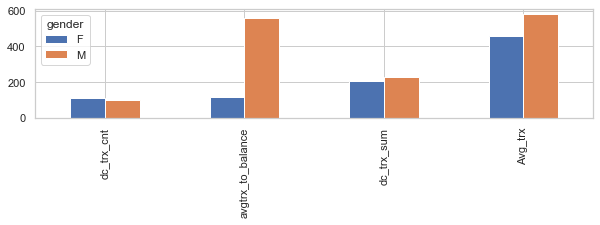

In [185]:
df_fm_T=df_fm.T
df_fm_T
df_fm_T.plot(kind='bar', figsize=(10, 2))

In [186]:
#Найдем разницу по показателям трат/остатков (средних значений)по картам между мужчинами и женщиками
df_fm.apply(lambda col: col.diff())

,dc_trx_cnt,avgtrx_to_balance,dc_trx_sum,Avg_trx
gender,,,,
F,NaN,NaN,NaN,NaN
М,-11.776724,438.564269,21.659316,120.361461


In [ ]:
#ВЫВОДЫ ПО ПЕРВОМУ ПРИБЛИЖЕНИЮ:   Женщины совершают покупки чаще мужчин, но  сумма покупки мужчин больше.Остатки по
#счетам карт у мужчин больще, чем у женщин. Точные данные приведены в таблице выше

In [ ]:
#ПРИМЕНИМ МЕТОД СТАНДАРТИЗАЦИИ

In [176]:
df_fm1=df.groupby(['gender'])['dc_trx_cnt', 'avgtrx_to_balance','dc_trx_sum','Avg_trx'].mean().reset_index()
df_fm1.set_index('gender', inplace=True)

In [177]:
df_fm1

,dc_trx_cnt,avgtrx_to_balance,dc_trx_sum,Avg_trx
gender,,,,
F,111.215255,118.622032,207842.853932,4590.102516
М,99.438531,557.186301,229502.169917,5793.717131


In [178]:
df_fm1.mean()

dc_trx_cnt              105.326893
avgtrx_to_balance       337.904166
dc_trx_sum           218672.511924
Avg_trx                5191.909824
dtype: float64

In [179]:
df_fm1.std()

dc_trx_cnt               8.327402
avgtrx_to_balance      310.111768
dc_trx_sum           15315.449209
Avg_trx                851.084056
dtype: float64

In [181]:
df_st=(df_fm1-df_fm1.mean())/df_fm1.std()
df_st

,dc_trx_cnt,avgtrx_to_balance,dc_trx_sum,Avg_trx
gender,,,,
F,0.707107,-0.707107,-0.707107,-0.707107
М,-0.707107,0.707107,0.707107,0.707107


In [174]:
df_st.mean()

dc_trx_cnt           0.000000e+00
avgtrx_to_balance    5.551115e-17
dc_trx_sum           0.000000e+00
Avg_trx              0.000000e+00
dtype: float64

In [175]:
df_st.std()

dc_trx_cnt           1.0
avgtrx_to_balance    1.0
dc_trx_sum           1.0
Avg_trx              1.0
dtype: float64

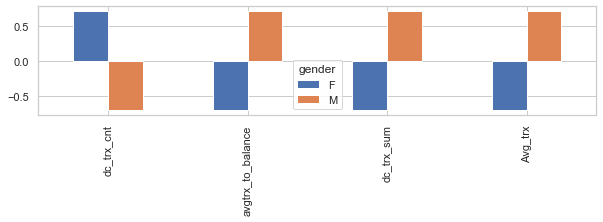

In [182]:
df_st_T=df_st.T
df_st_T
df_st_T.plot(kind='bar', figsize=(10, 2))

In [ ]:
#ВЫВОДЫ ПО МЕТОДУ СТАНДАРТИЗАЦИИ:    Так же, как и способом выше- Женщины совершают покупки чаще мужчин, но  сумма покупки мужчин больше.Остатки по
#счетам карт у мужчин больще, чем у женщин. 

In [ ]:
II.

In [ ]:
#Проанализируем объемы кредитования по различным кредитным продуктам в зависимости от размера населенного пункта.
#Для этого создадим новый df_city на базе исходного. Найдем средние значения
#требуемых показателей в разрезе градаций по размерам населенных пунктов.

In [20]:
df_city=df.groupby(['city_type'])['ml_balance','cl_balance_0m', 'loan_balance_0m','min_loan_balance_1q','max_loan_balance_1q','avg_loan_balance_1Y'].mean().reset_index()

df_city

,city_type,ml_balance,cl_balance_0m,loan_balance_0m,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y
0,100-500,10124.896902,67425.976933,87603.419787,81037.631805,95842.786788,85144.700506
1,1M+,17193.745653,56129.776859,79938.255755,74613.406735,86509.228942,77612.187775
2,500-1000,10097.149888,56742.027056,74968.727910,68286.751794,81290.940227,70358.961689
3,<100,7644.066770,63142.912135,77696.633243,72012.300410,84299.835769,74756.864017
4,Mega,23568.911413,53533.495433,85903.987920,80432.324841,95726.391942,86426.739978


In [21]:
df_city.set_index('city_type', inplace=True)
df_city

,ml_balance,cl_balance_0m,loan_balance_0m,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y
city_type,,,,,,
100-500,10124.896902,67425.976933,87603.419787,81037.631805,95842.786788,85144.700506
1M+,17193.745653,56129.776859,79938.255755,74613.406735,86509.228942,77612.187775
500-1000,10097.149888,56742.027056,74968.727910,68286.751794,81290.940227,70358.961689
<100,7644.066770,63142.912135,77696.633243,72012.300410,84299.835769,74756.864017
Mega,23568.911413,53533.495433,85903.987920,80432.324841,95726.391942,86426.739978


In [22]:
df_cityT=df_city.T

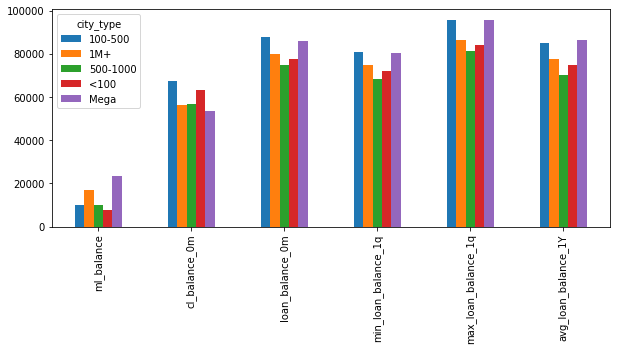

In [23]:
df_cityT.plot(kind='bar', figsize=(10, 4))

In [ ]:
#Выводы по первому приближению по среднему значению данных:
#самые большие остатки по ипотеке  ml_balance в city_type  со статусом  Mega;
#самые большие остатки по потребительским кредитам   cl_balance_0m в city_type 100-500;
#самые большие остатки по всем кредитам loan_balance_0m,  минимальные остатки по кредитам min_loan_balance_1q
#максимальные остатки по кредитам max_loan_balance_1q, средние остатки по кредитам avg_loan_balance_1Y
#в city_type 100-500 и city_typ со статусом  Mega


In [ ]:
df_city=df.groupby(['city_type'])['ml_balance','cl_balance_0m', 'loan_balance_0m','min_loan_balance_1q','max_loan_balance_1q','avg_loan_balance_1Y'].mean()

df_city

In [24]:
df_liabilities=df.groupby(['city_type'])['min_casa_balance_1q','max_casa_balance_1q','avg_casa_balance_1Y','casa_balance_0m'].mean().reset_index()
df_liabilities

,city_type,min_casa_balance_1q,max_casa_balance_1q,avg_casa_balance_1Y,casa_balance_0m
0,100-500,29319.888369,54132.295605,38987.833331,39305.289188
1,1M+,83507.775872,130236.231749,102265.391860,98512.858700
2,500-1000,26559.188771,51741.661802,33471.984446,38067.838723
3,<100,13862.835551,35891.698184,22034.420114,23621.772057
4,Mega,154414.833461,236135.164278,164969.989349,178621.293838


In [27]:
df_liabilities.set_index('city_type', inplace=True)
df_liabilities

,min_casa_balance_1q,max_casa_balance_1q,avg_casa_balance_1Y,casa_balance_0m
city_type,,,,
100-500,29319.888369,54132.295605,38987.833331,39305.289188
1M+,83507.775872,130236.231749,102265.391860,98512.858700
500-1000,26559.188771,51741.661802,33471.984446,38067.838723
<100,13862.835551,35891.698184,22034.420114,23621.772057
Mega,154414.833461,236135.164278,164969.989349,178621.293838


In [28]:
df_liabilitiesT=df_liabilities.T


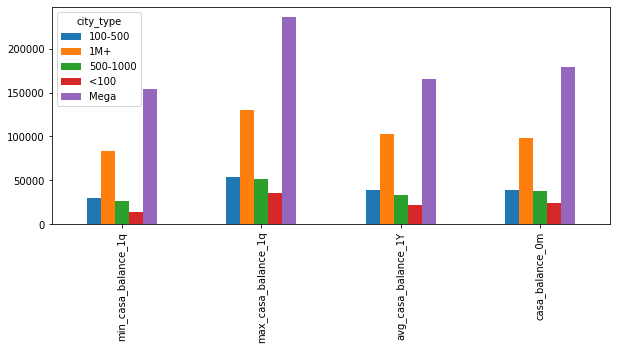

In [29]:
df_liabilitiesT.plot(kind='bar', figsize=(10, 4))

In [38]:
df_city_influence=df[['casa_balance_0m','loan_balance_0m']]


In [39]:
df_city_influence_corr_matrix = df_city_influence.corr()
df_city_influence_corr_matrix

,casa_balance_0m,loan_balance_0m
casa_balance_0m,1.000000,-0.005749
loan_balance_0m,-0.005749,1.000000


In [ ]:
 III.

In [ ]:
# Посмотрим, какой же населенный пункт приносит максимальный nbi- доход от клиента без OPEX. 
#  Предположительно это населенный пункт  city_type 100-500 и city_type со статусом  Mega- судя  по объемам кредитования
#Для этого создадим новый df_OPEX на базе исходного. Найдем средние значения
#требуемых показателей в разрезе градаций по размерам населенных пунктов.

                    nbi
city_type              
Mega       16038.028280
100-500    12001.960351
1M+        11532.545261
<100       10901.987569
500-1000   10303.616441


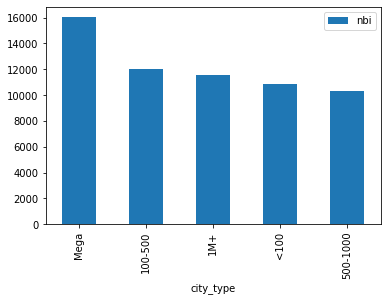

In [28]:
df_OPEX=df.groupby(['city_type'])['nbi'].mean().reset_index()
df_OPEX.set_index('city_type', inplace=True)
#df_OPEX.sort_values
df_OPEX=df_OPEX.sort_values('nbi',ascending=False)
print(df_OPEX)

df_OPEX.plot(kind='bar')

In [29]:
#Выводы по первому приближению по среднему значению данных:
#Да,как и предполагалось- max доход от клиента без OPEX  в населенном пункте со статусом city_type Mega,   
# на втором месте населенный пункт  city_type 100-500

In [ ]:
#Следует отметить, что min значения как по  остаткам по всем кредитам loan_balance_0m, так и по доходу от клиента без OPEX
#наблюдается в населенном пункте city_type 500-1000.

In [ ]:
IV.

In [ ]:
#Посмотрим, в каком возрасте больше всего откладывают средств на депозит.
#Для этого создадим новый df_deposit на базе исходного. Найдем сумму депозитов
#по возрастам

In [115]:
df_deposit=df.groupby(['age'])['td_balance_0m'].sum().reset_index()
df_deposit.head()

,age,td_balance_0m
0,4,0.0
1,8,0.0
2,9,0.0
3,10,0.0
4,13,0.0


In [116]:
df_deposit = df_deposit.loc[df_deposit['td_balance_0m'] != 0]
df_deposit.head()


,age,td_balance_0m
5,14,883545.21
7,16,100143.52
8,17,268808.08
9,18,53245.09
10,19,5711913.42


In [161]:
df_deposit_td=df_deposit.sort_values(by='td_balance_0m',ascending=False)
df_deposit_td.head()
#Вывод по данным: max сумма депозита у клиентов в возрасте 74 года и 64 года

,age,td_balance_0m
65,74,3.497449e+08
55,64,1.974482e+08
46,55,1.338935e+08
45,54,1.163761e+08
47,56,1.151753e+08


In [118]:
df_deposit_a=df_deposit.sort_values('age')
df_deposit_a.head()

,age,td_balance_0m
5,14,883545.21
7,16,100143.52
8,17,268808.08
9,18,53245.09
10,19,5711913.42


Text(0.5, 1, 'Суммы депозитов клиентов в зависимости от возраста клиентов ')

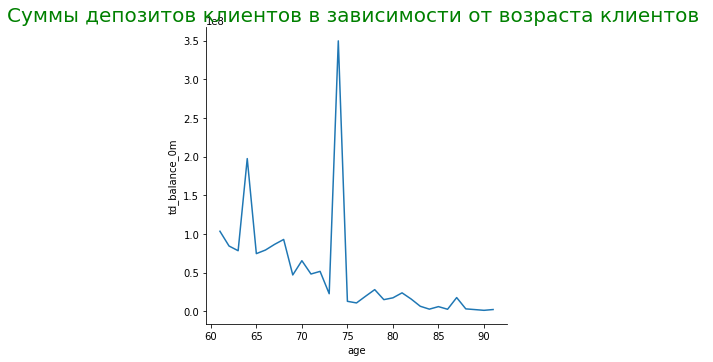

In [122]:
sns.relplot(x='age', y='td_balance_0m', data=df_deposit_a.query("age >60"), kind='line')
plt.title('Суммы депозитов клиентов в зависимости от возраста клиентов ', size=20, color='g')


Text(0.5, 1, 'Суммы депозитов клиентов в зависимости от возраста клиентов')

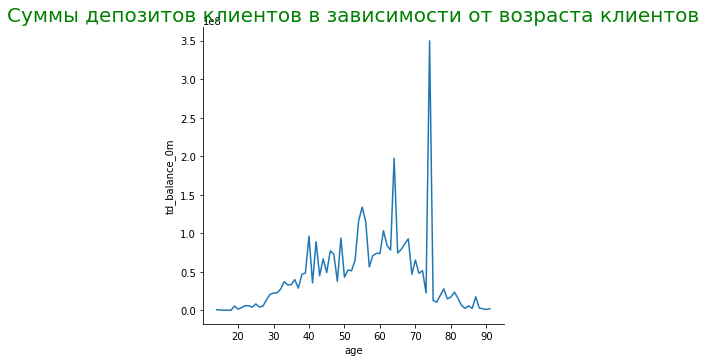

In [127]:
sns.relplot(x='age', y='td_balance_0m', data=df_deposit_a, kind='line')
plt.title('Суммы депозитов клиентов в зависимости от возраста клиентов', size=20, color='g')

Text(0.5, 1, 'Диаграмма рассеяния Суммы депозитов клиентов в зависимости от возраста клиентов')

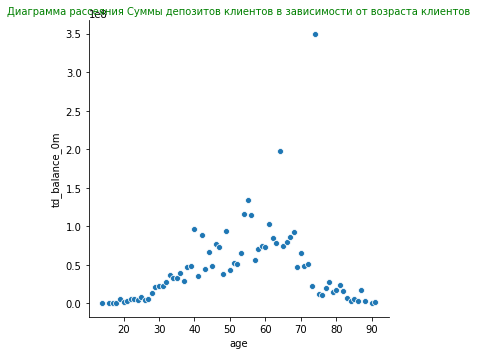

In [130]:
sns.relplot(x='age', y='td_balance_0m', data=df_deposit_a, kind='scatter')
plt.title('Диаграмма рассеяния Суммы депозитов клиентов в зависимости от возраста клиентов', size=10, color='g')

In [ ]:
#Если не учитывать выросы, то распределение значений приближается у нормальному, особенно в начале и в конце графика
# для клитентов до 30 лет и свыше 80 лет характерны небольшие суммы депозитов.

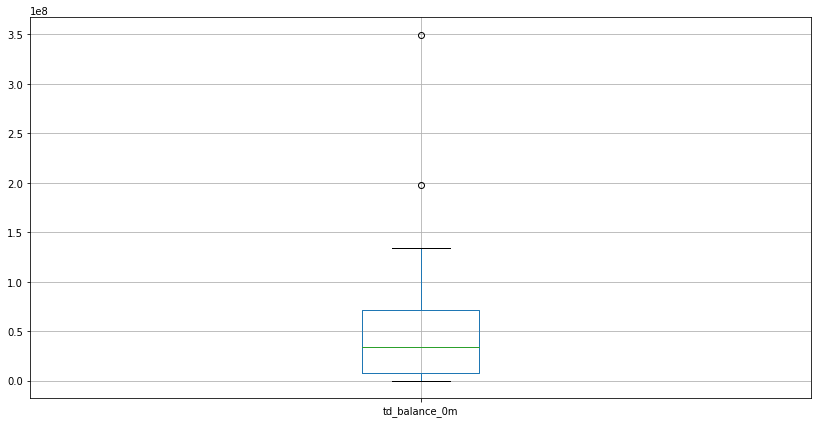

In [133]:
df_deposit_a[['td_balance_0m']].boxplot(figsize = (14, 7))

In [ ]:
#Вывод по диаграме boxplot: Наши полученные  max значения остатков по депозитам для возраста 74 и 64 года
#3.5*10^8 и 2*10^8- являются выбросом 
#  и не характерны для распределения данных  ряда.Значения от min до max находятся в диапазоне от 0 до 1,35 *10^8. Медианное 
# значение находится на уровне 0,35*10^8

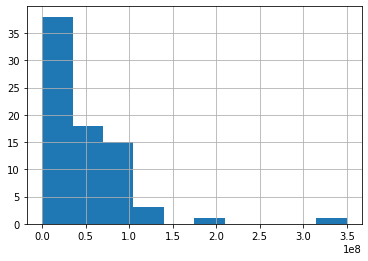

In [134]:
df_deposit_a.td_balance_0m.hist()

In [ ]:
#Вывод по диаграме hist: Также видно, что наши полученные  max значения остатков по депозитам для возраста 74 и 64 года
#3.5*10^8 и 2*10^8- являются выбросом 


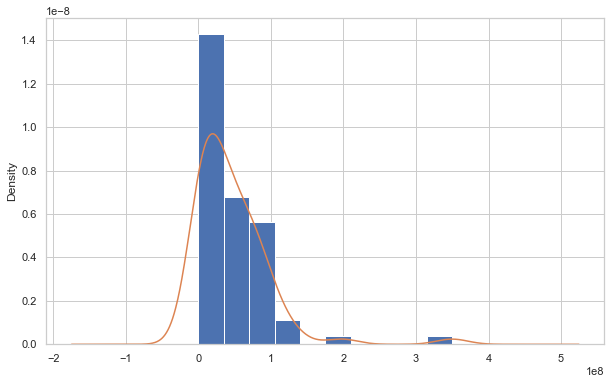

In [160]:
#Сделаем оценку плотности ядра полученной выше гистограммы:

s = df_deposit_a.td_balance_0m
s.hist(density=True)
s.plot(kind='kde', figsize=(10,6))

In [ ]:
# с увеличением  суммы депозита  количество депозитов уменьшается

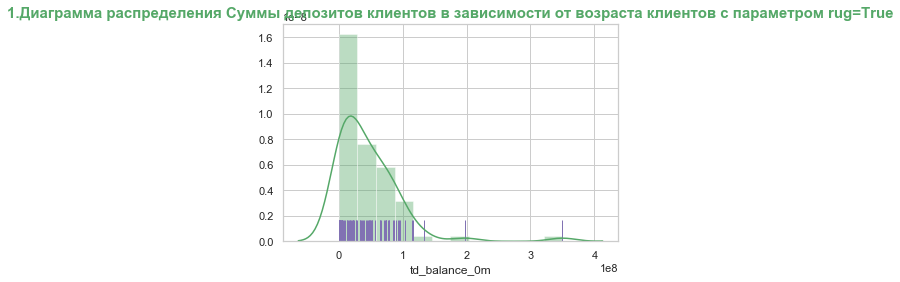

In [158]:


sns.set(style='whitegrid', color_codes=True)

sns.distplot(
    df_deposit_a.td_balance_0m,
    color='g', 
    rug=True, 
    rug_kws={"color": 'm', "height": 0.1}
    
)
plt.title('1.Диаграмма распределения Суммы депозитов клиентов в зависимости от возраста клиентов с параметром rug=True', size=15, color='g', weight='bold')
plt.show();

In [ ]:
V.

In [ ]:
#Допустим (чисто гипотетически в качестве примера на массиве данных), для задачи машинного обучения в качестве фичей 
#планируется использовать 4 показателя(остатки по балансу разных   временных интервалов):
#min_casa_balance_1q показатели по счетам за квартал
#max_casa_balance_1q
#avg_casa_balance_1Y показатели по счетам за год
#casa_balance_0m
#Рассмотрим вопрос наличия корреляции между этими показателями для принятия решения о совместном их
#использовании в качестве фичей для решения задачи машинного обучения:

In [154]:
df_bal=df[['min_casa_balance_1q','max_casa_balance_1q','avg_casa_balance_1Y','casa_balance_0m']]
df_bal.head()


,min_casa_balance_1q,max_casa_balance_1q,avg_casa_balance_1Y,casa_balance_0m
0,0.0000,0.0000,0.000000,0.0000
1,3272.9367,4280.1960,4716.127317,3272.9367
2,6249.7550,10311.6588,10239.601283,6249.7550
3,14354.9370,15086.7999,13905.841283,14354.9370
4,91511.7691,93649.4406,96089.612758,91511.7691


In [152]:
df_bal_corr_matrix = df_bal.corr()
df_bal_corr_matrix

,min_casa_balance_1q,max_casa_balance_1q,avg_casa_balance_1Y,casa_balance_0m
min_casa_balance_1q,1.000000,0.975098,0.930333,0.988638
max_casa_balance_1q,0.975098,1.000000,0.934124,0.972726
avg_casa_balance_1Y,0.930333,0.934124,1.000000,0.919708
casa_balance_0m,0.988638,0.972726,0.919708,1.000000


In [7]:
plt.figure(figsize=(7, 7))
plt.imshow(df_bal_corr_matrix, cmap='Greens') #'Greens'
plt.colorbar()  # добавим шкалу интенсивности цвета

plt.xticks(range(len(df_bal_corr_matrix.columns)), df_bal_corr_matrix.columns)
plt.yticks(range(len(df_bal_corr_matrix)), df_bal_corr_matrix.index)

NameError: name 'df_bal_corr_matrix' is not defined

<Figure size 504x504 with 0 Axes>

In [ ]:
#Вывод по данным: Между данными наблюдается достаточно высокая корреляция. Коэфф корреляции от  0,92 до 1.
#Если использовать все 4 показателя в качестве фичей при задаче машинного обучения, то это может ухудшить результат,
#в связи с высокой корреляцией между данными. Рекомендуется не использовать все фичи совместно. Произвести  выбор.

#Здесь наименьшая корреляция наблюдается между casa_balance_0m и avg_casa_balance_1Y,но все равно значение коэф корр велико 92%

#Так же дополнительно следует отметить, что  данные
#min_casa_balance_1q
#max_casa_balance_1q
#avg_casa_balance_1Y
#casa_balance_0m
#похожи межу собой т.е. не большое отклонение между min, max,avg  значением.

In [ ]:
#Отрисуем графики. Возможно, это периодические поступления

In [ ]:
plt.figure(figsize=(24, 6))
plt.plot(dbc_svod['Date'],dbc_svod['curs EUR'])
plt.plot(dbc_svod['Date'],dbc_svod['OIL'])
plt.title("Динамика курса ЕВРО/Котировок нефти  за период")
plt.xlabel('Период')
plt.ylabel('Курс ЕВРО/Котировки нефти')

In [ ]:
df[['min_casa_balance_1q','max_casa_balance_1q','avg_casa_balance_1Y','casa_balance_0m']]

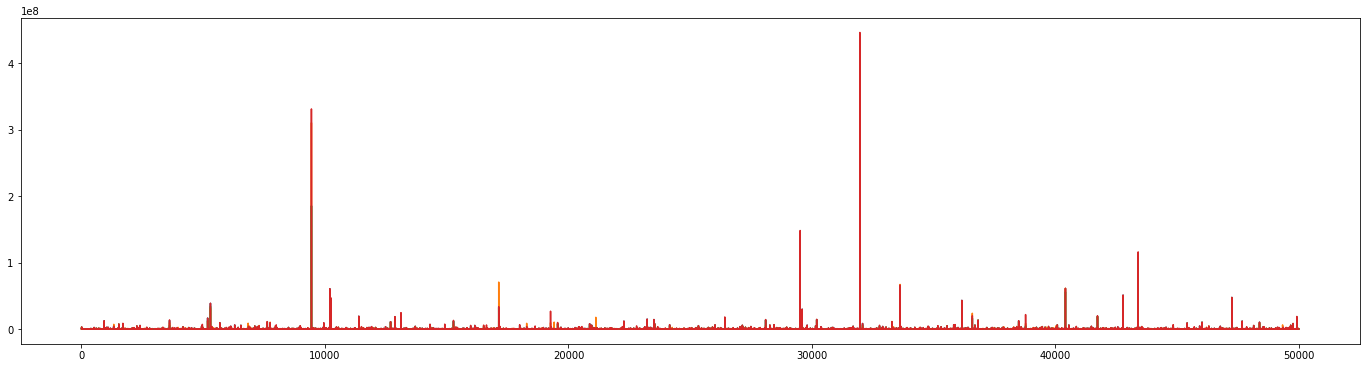

In [11]:
plt.figure(figsize=(24, 6))
plt.plot(df['casa_balance_0m'])
plt.plot(df['avg_casa_balance_1Y'])
plt.plot(df['min_casa_balance_1q'])
plt.plot(df['max_casa_balance_1q'])
